# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Deskripsi**

Dataset ini berisi metrik penggunaan perangkat smart home yang memberikan wawasan tentang perilaku pengguna, efisiensi perangkat, dan preferensi penggunaan. Di dalamnya terdapat informasi mengenai jenis perangkat, pola penggunaan, konsumsi energi, insiden kerusakan, serta tingkat kepuasan pengguna.

**penjelasa fitur**

* UserID: Identitas unik untuk setiap pengguna.
* DeviceType: Jenis perangkat smart home
* UsageHoursPerDay: Rata-rata durasi penggunaan perangkat per hari
* EnergyConsumption: Konsumsi energi harian perangkat (dalam kWh).
* UserPreferences: Preferensi pengguna terhadap penggunaan perangkat(0 = Low, 1 = High)
* MalfunctionIncidents: Jumlah insiden kerusakan yang dilaporkan
* DeviceAgeMonths: Usia perangkat dalam bulan.
* SmartHomeEfficiency (Variabel Target): Status efisiensi perangkat smart home
(0 = Inefficient, 1 = Efficient).

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here
df = pd.read_csv("/content/smart_home_device_usage_data.csv")

In [ ]:
df.head(5)

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [ ]:
df.shape

(5403, 8)

In [ ]:
df.columns

Index(['UserID', 'DeviceType', 'UsageHoursPerDay', 'EnergyConsumption',
       'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths',
       'SmartHomeEfficiency'],
      dtype='object')

In [ ]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [ ]:
df.isnull().sum()

,0
UserID,0
DeviceType,0
UsageHoursPerDay,0
EnergyConsumption,0
UserPreferences,0
MalfunctionIncidents,0
DeviceAgeMonths,0
SmartHomeEfficiency,0


In [ ]:
df.duplicated().sum()

np.int64(0)

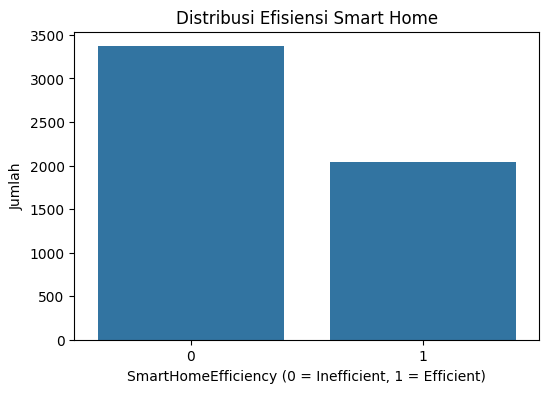

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="SmartHomeEfficiency", data=df)
plt.title("Distribusi Efisiensi Smart Home")
plt.xlabel("SmartHomeEfficiency (0 = Inefficient, 1 = Efficient)")
plt.ylabel("Jumlah")
plt.show()


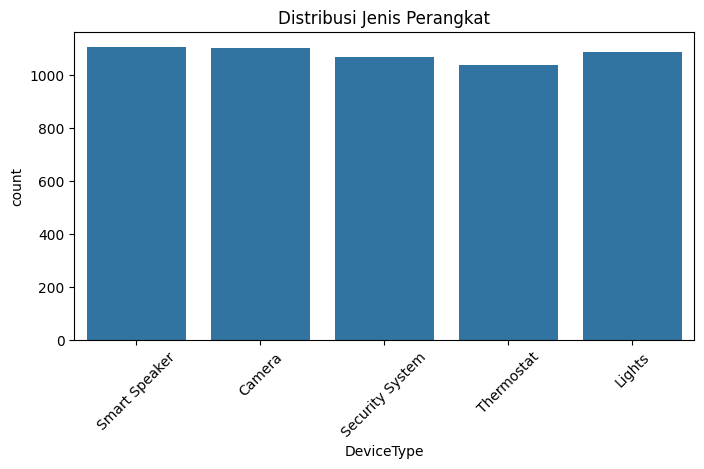

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="DeviceType", data=df)
plt.title("Distribusi Jenis Perangkat")
plt.xticks(rotation=45)
plt.show()


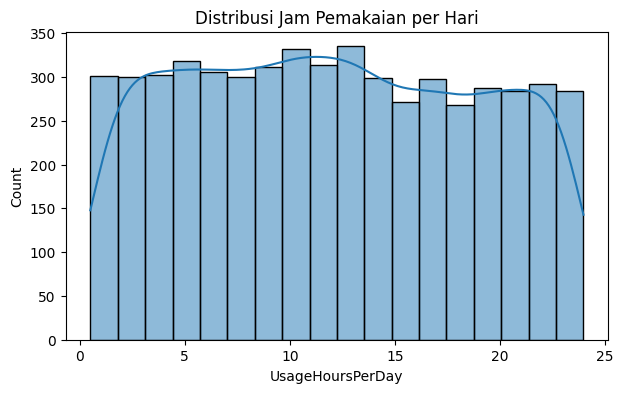

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df["UsageHoursPerDay"], kde=True)
plt.title("Distribusi Jam Pemakaian per Hari")
plt.show()

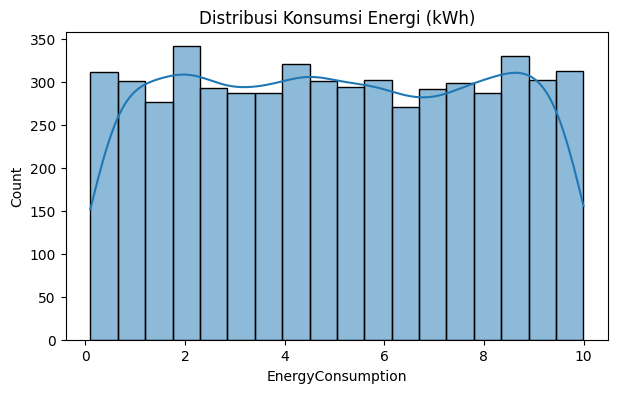

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df["EnergyConsumption"], kde=True)
plt.title("Distribusi Konsumsi Energi (kWh)")
plt.show()

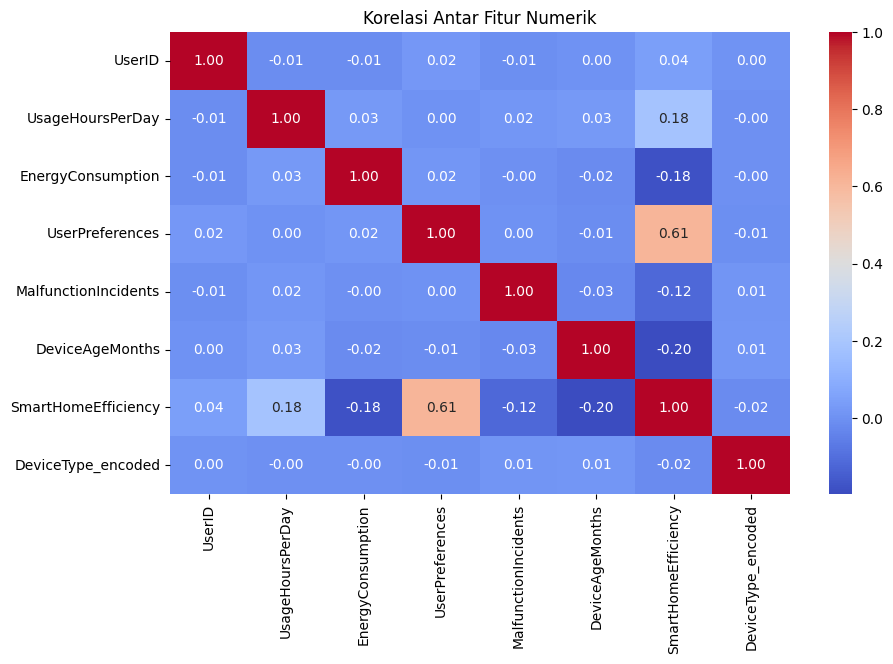

In [ ]:
le1 = LabelEncoder()
df['DeviceType_encoded'] = le1.fit_transform(df['DeviceType'])

numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


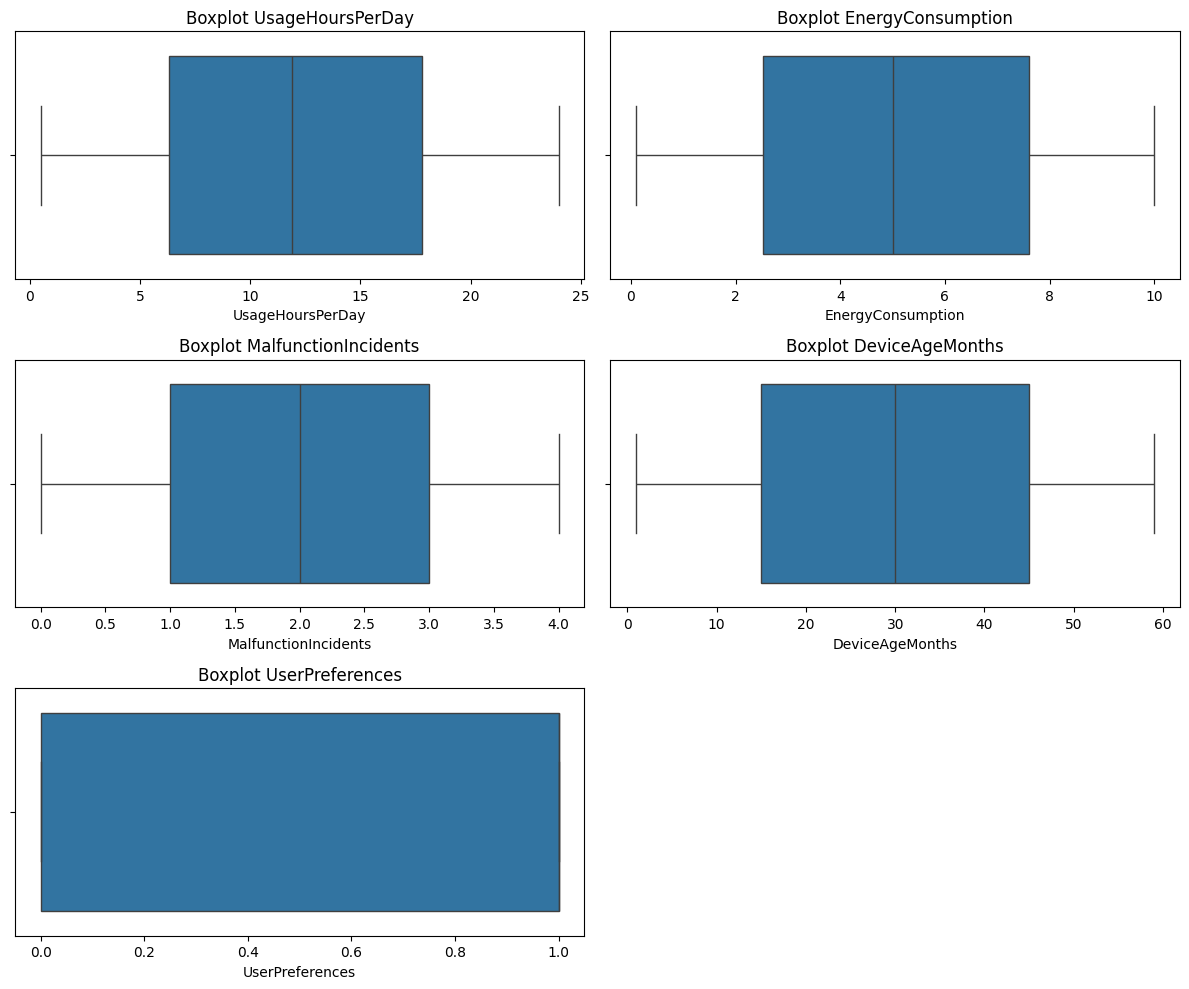

In [ ]:
num_cols = ["UsageHoursPerDay", "EnergyConsumption", "MalfunctionIncidents", "DeviceAgeMonths","UserPreferences"]

plt.figure(figsize=(12,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()


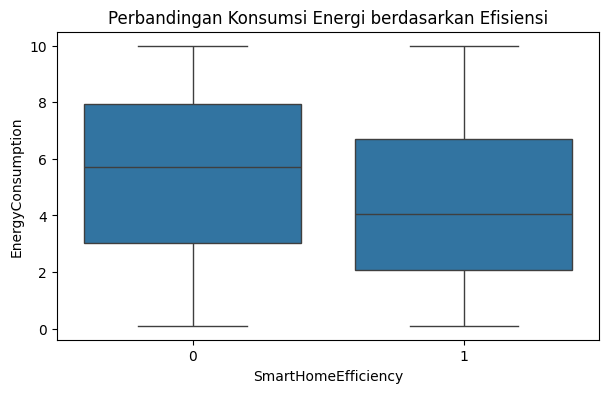

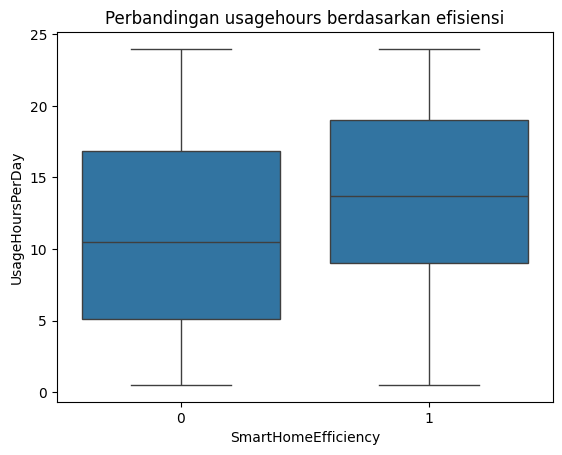

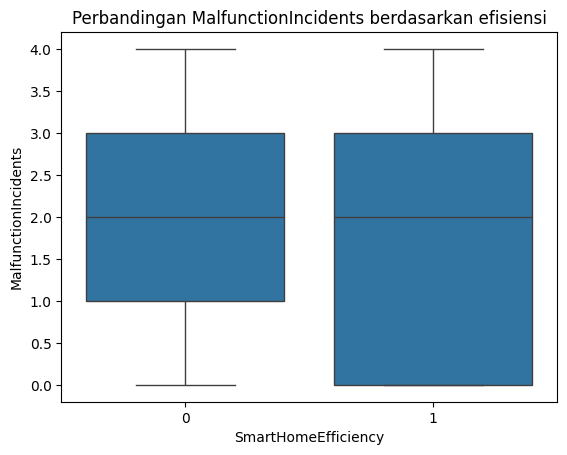

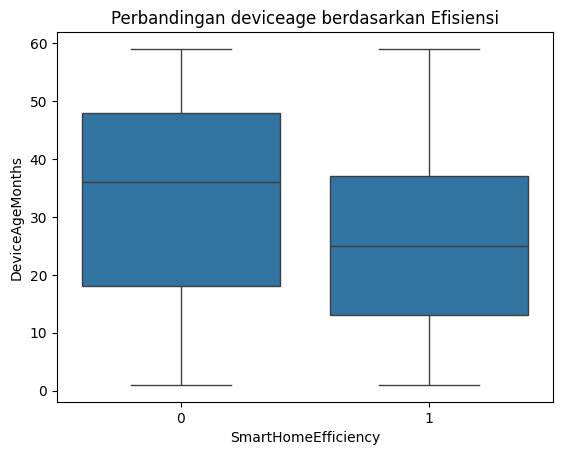

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x="SmartHomeEfficiency", y="EnergyConsumption", data=df)
plt.title("Perbandingan Konsumsi Energi berdasarkan Efisiensi")
plt.show()

sns.boxplot(x="SmartHomeEfficiency", y="UsageHoursPerDay", data=df)
plt.title("Perbandingan usagehours berdasarkan efisiensi")
plt.show()

sns.boxplot(x="SmartHomeEfficiency", y="MalfunctionIncidents", data=df)
plt.title("Perbandingan MalfunctionIncidents berdasarkan efisiensi")
plt.show()

sns.boxplot(x="SmartHomeEfficiency", y="DeviceAgeMonths", data=df)
plt.title("Perbandingan deviceage berdasarkan Efisiensi")
plt.show()


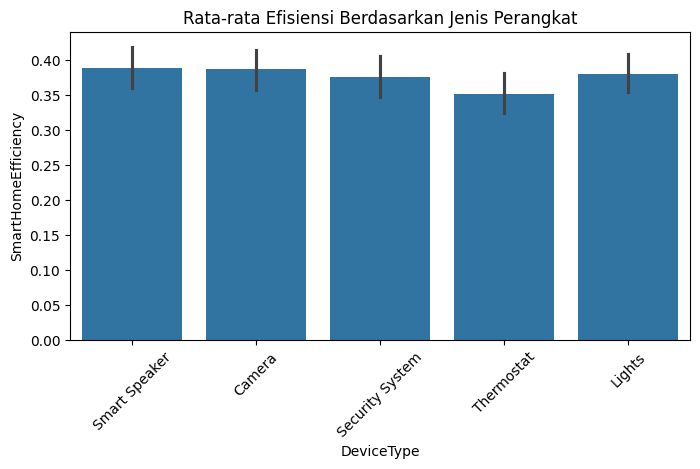

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x="DeviceType", y="SmartHomeEfficiency", data=df)
plt.title("Rata-rata Efisiensi Berdasarkan Jenis Perangkat")
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
for col in df.columns:
    print(f"\n{col} ({df[col].nunique()} unique):")
    print(df[col].unique()[:10])



UserID (5403 unique):
[ 1  2  3  4  5  6  7  8  9 10]

DeviceType (5 unique):
['Smart Speaker' 'Camera' 'Security System' 'Thermostat' 'Lights']

UsageHoursPerDay (5403 unique):
[15.30718848 19.97334329 18.91153466  7.01112737 22.61068398  3.42212727
 21.06564004 23.31709587  4.6631078  17.46855251]

EnergyConsumption (5403 unique):
[1.96160682 8.61068892 2.65177663 2.34165309 4.85906916 5.03862514
 2.22934376 2.79142119 1.78008187 7.21275577]

UserPreferences (2 unique):
[1 0]

MalfunctionIncidents (5 unique):
[4 0 3 2 1]

DeviceAgeMonths (59 unique):
[36 29 20 15  3 56 53 23 58 54]

SmartHomeEfficiency (2 unique):
[1 0]

DeviceType_encoded (5 unique):
[3 0 2 4 1]


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

UserID: 0 outliers
UsageHoursPerDay: 0 outliers
EnergyConsumption: 0 outliers
UserPreferences: 0 outliers
MalfunctionIncidents: 0 outliers
DeviceAgeMonths: 0 outliers
SmartHomeEfficiency: 0 outliers
DeviceType_encoded: 0 outliers


In [ ]:
df = df.drop(columns=["UserID","DeviceType_encoded"])

In [ ]:
df.head()

,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,Smart Speaker,15.307188,1.961607,1,4,36,1
1,Camera,19.973343,8.610689,1,0,29,1
2,Security System,18.911535,2.651777,1,0,20,1
3,Camera,7.011127,2.341653,0,3,15,0
4,Camera,22.610684,4.859069,1,3,36,1


In [ ]:
en = LabelEncoder()
df["DeviceType"] = en.fit_transform(df["DeviceType"])
df.head()

,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,3,15.307188,1.961607,1,4,36,1
1,0,19.973343,8.610689,1,0,29,1
2,2,18.911535,2.651777,1,0,20,1
3,0,7.011127,2.341653,0,3,15,0
4,0,22.610684,4.859069,1,3,36,1


In [ ]:
X = df.drop(columns=["SmartHomeEfficiency"])
y = df["SmartHomeEfficiency"]

print("Target distribution:")
print(y.value_counts())


Target distribution:
SmartHomeEfficiency
0    3368
1    2035
Name: count, dtype: int64


In [ ]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print("Train class distribution:")
print(y_train.value_counts())

Train class distribution:
SmartHomeEfficiency
0    2694
1    1628
Name: count, dtype: int64


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_res.value_counts())


After SMOTE:
SmartHomeEfficiency
0    2694
1    2694
Name: count, dtype: int64
